In [1]:
# needed
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import mpld3
from dataset import dataset

plt.style.use('seaborn')

# Loading the data files

In [2]:
ds = dataset()
ds.build_train_set()

In [3]:
ds.training_data.head()

,temp,delta_t,PERF_COUNT_HW_CPU_CYCLES,PERF_COUNT_HW_INSTRUCTIONS,PERF_COUNT_HW_CACHE_MISSES,PERF_COUNT_HW_BRANCH_MISSES,PERF_COUNT_HW_BRANCH_INSTRUCTIONS,PERF_COUNT_HW_CACHE_LL_read_miss,PERF_COUNT_HW_CACHE_L1D_read_miss,d_temp
0,61.224,1.0,1.199925e+09,5.256063e+08,2.029911e+06,2.993070e+06,5.071249e+07,1.619228e+06,2.029934e+06,0.065357
1,67.142,1.0,1.047219e+09,4.517474e+08,2.017318e+06,2.546153e+06,4.366421e+07,1.458473e+06,2.017354e+06,-0.167114
2,67.142,1.0,1.199941e+09,5.194245e+08,2.154760e+06,2.930493e+06,5.018391e+07,1.628087e+06,2.154797e+06,0.046321
3,62.300,1.0,1.152591e+09,5.029426e+08,2.002572e+06,2.866639e+06,4.855847e+07,1.577407e+06,2.002598e+06,0.026636
4,62.838,1.0,1.184833e+09,5.161476e+08,2.072373e+06,2.931416e+06,4.983194e+07,1.612395e+06,2.072402e+06,0.031293


# Scaling the data

In [4]:
# get the inputs and targets
X = ds.training_data.drop('d_temp', axis=1).to_numpy()
y = ds.training_data.d_temp.to_numpy()

# scale the data
scaler = MinMaxScaler()
Xs = scaler.fit_transform(X)

# show scaled data
pd.DataFrame(Xs, columns=ds.training_data.columns[:-1]).head()

,temp,delta_t,PERF_COUNT_HW_CPU_CYCLES,PERF_COUNT_HW_INSTRUCTIONS,PERF_COUNT_HW_CACHE_MISSES,PERF_COUNT_HW_BRANCH_MISSES,PERF_COUNT_HW_BRANCH_INSTRUCTIONS,PERF_COUNT_HW_CACHE_LL_read_miss,PERF_COUNT_HW_CACHE_L1D_read_miss
0,0.533333,0.0,0.999930,0.529043,0.343477,0.318502,0.405086,0.831527,0.343474
1,0.900000,0.0,0.868291,0.451190,0.341318,0.264593,0.345262,0.748606,0.341317
2,0.900000,0.0,0.999944,0.522527,0.364881,0.310954,0.400600,0.836097,0.364881
3,0.600000,0.0,0.959126,0.505154,0.338789,0.303252,0.386804,0.809955,0.338788
4,0.633333,0.0,0.986920,0.519073,0.350756,0.311065,0.397612,0.828003,0.350755


# Modeling

In [5]:
# create regressor
LM = linear_model.Ridge(alpha=1)

# train model
LM.fit(Xs, y)

# show trained model coefs
pd.DataFrame(LM.coef_, columns=['coef'], index=ds.training_data.columns[:-1])

,coef
temp,-0.326307
delta_t,0.000000
PERF_COUNT_HW_CPU_CYCLES,-0.124478
PERF_COUNT_HW_INSTRUCTIONS,0.159300
PERF_COUNT_HW_CACHE_MISSES,0.022084
PERF_COUNT_HW_BRANCH_MISSES,0.312703
PERF_COUNT_HW_BRANCH_INSTRUCTIONS,0.285091
PERF_COUNT_HW_CACHE_LL_read_miss,0.265617
PERF_COUNT_HW_CACHE_L1D_read_miss,0.022162


# Predict on testing data

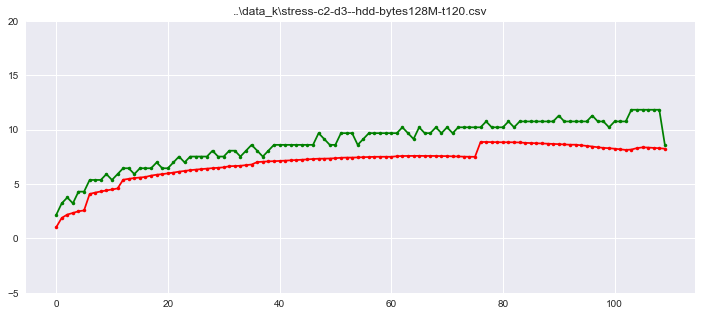

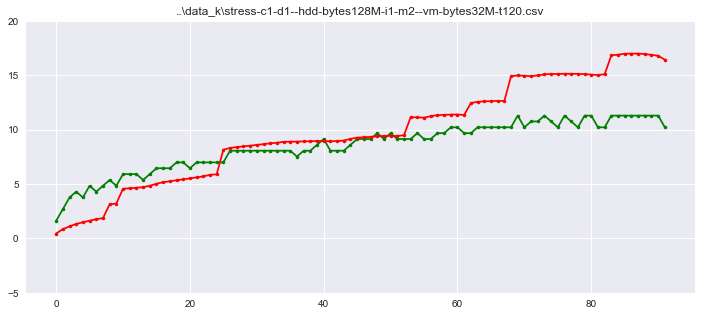

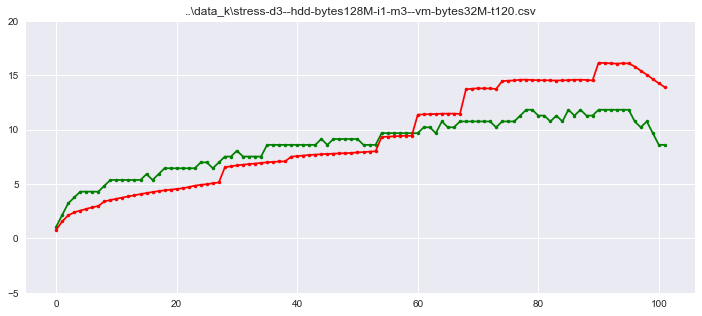

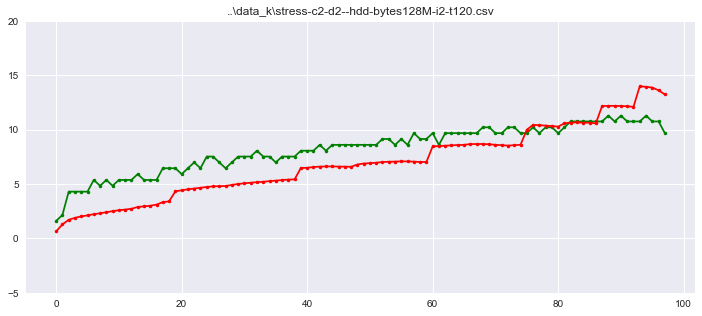

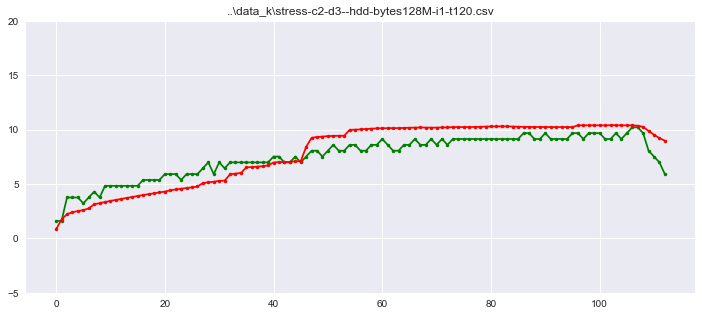

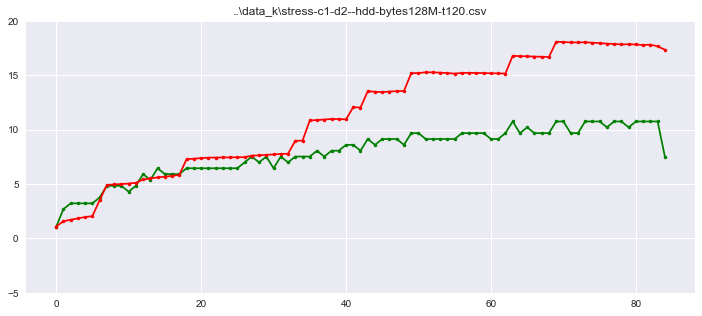

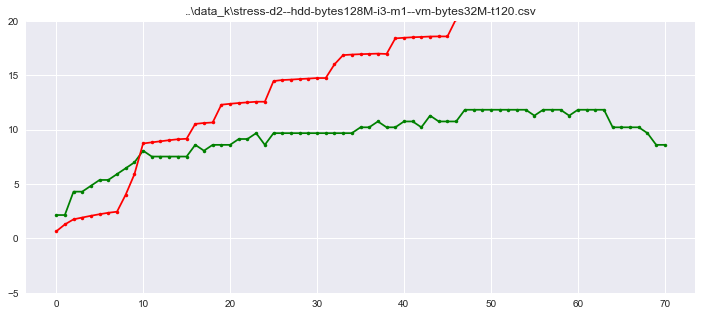

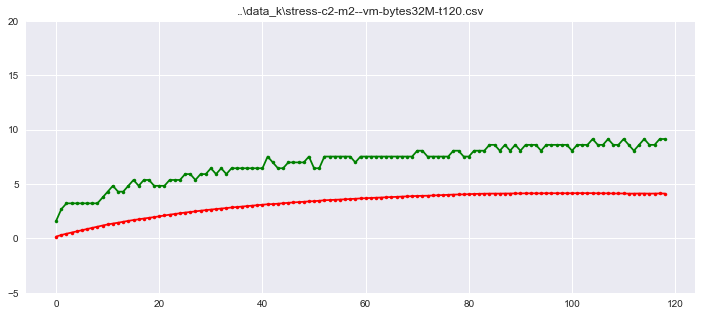

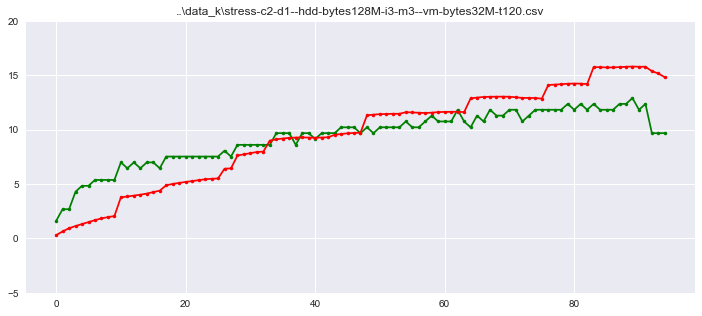

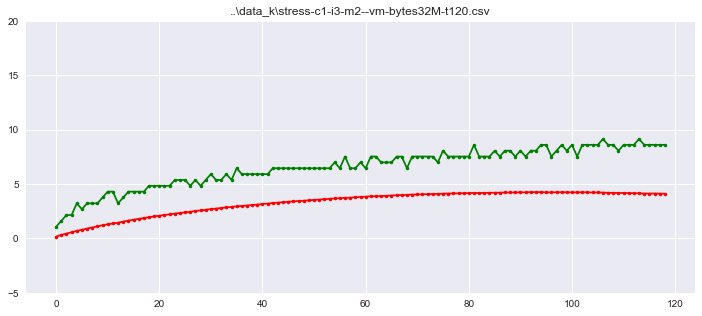

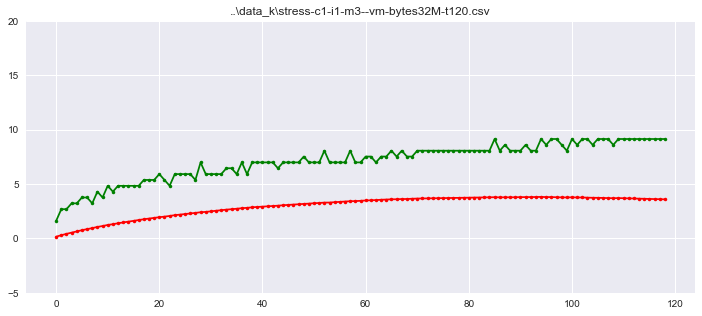

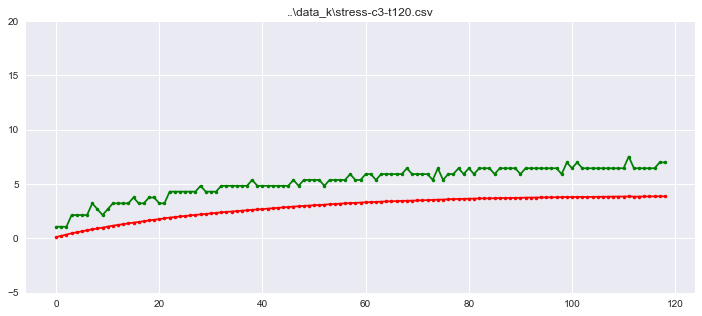

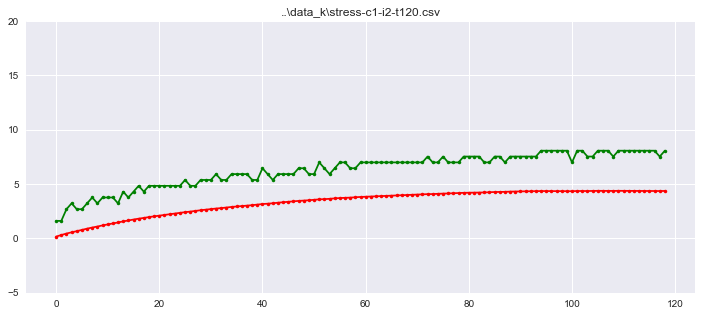

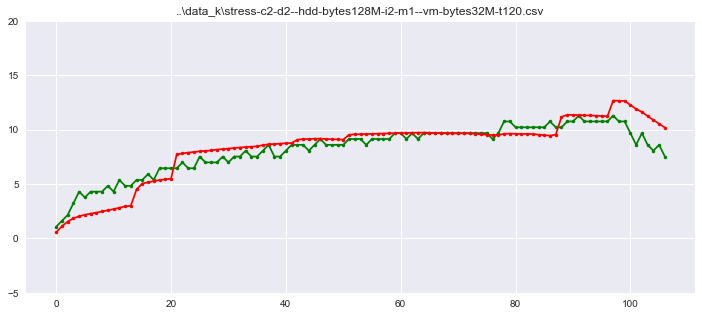

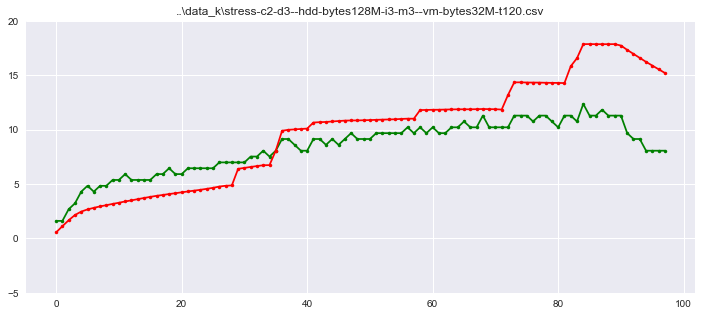

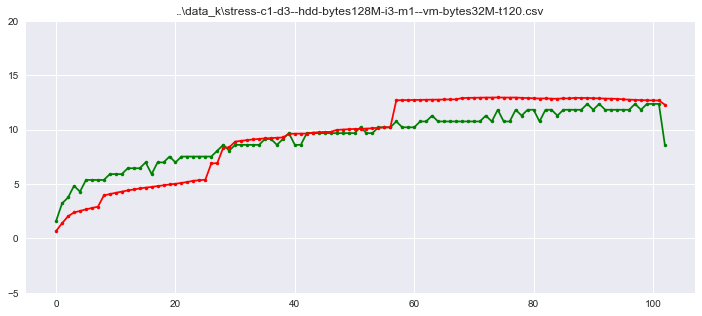

In [6]:
for fname in ds.test_files:

    # load the test file with target calculated
    tdf = dataset._delta_temp_column(fname)

    # get the target
    truth = tdf.d_temp.to_numpy()

    # drop target from model input
    tdf = tdf.drop('d_temp', axis=1)

    # SCALE AND PREDICT
    tdfs = scaler.transform(tdf)
    pred = LM.predict(tdfs)

    # plot
    plt.figure(figsize=(12,5))
    plt.ylim((-5,20))
    plt.title(fname)
    plt.plot(range(len(truth)), np.cumsum(truth), 'g.-')
    plt.plot(range(len(pred)), np.cumsum(pred), 'r.-') 


